(content:analysisofresults)=
# Analysis of evaluation results

To determine the quality and performance of speech processing methods,
we often use [subjective](content:subjectiveevaluation) and [objective
evaluation](content:objectiveevaluation) methods. These methods, however,
give an array of results: one result for each sound sample for objective
methods, and in the case of subjective listening tests, one result for
each sound sample per listener. Invariably, the results are noisy in
the sense that each sound sample and each listener will give a different
result. How do we then determine whether one method is better than the
other? In short, we have to perform a statistical analysis of the results. The
types of questions we can answer with statistical analysis include:
"Based on measurement results, which result is most probable, that A is
better than B, that B is better than A, or is it impossible to
determine?"

## Informal analysis

In practical laboratory work, after an experiment, you would always like
to get a first impression of the results as quickly as possible. With
informal analysis, we here refer to the quick-and-dirty evaluation of data
to determine whether it is worth investing time in a more formal
analysis. That is, if we, already in the informal analysis, determine that
our new method is not really better than past methods, then it is more
productive to improve the method rather than perform a detailed analysis
of results. On the other hand, a detailed analysis can sometimes reveal
effects that are not visible in informal analysis and which could be
used to improve the method in question. In any case, when reporting
results (in a publication or even just to your superior), informal
analysis should never replace properly applied statistical tests.
Informal tests just indicate how much work will be
required for proper tests.

### Example 1 

Suppose we want to compare methods A and B, and we have already applied
PESQ on the outputs of both methods for 1000 speech samples. How do we
know if A is better than B?

In [1]:
import numpy as np
import pandas as pd
import altair as alt

df = pd.read_pickle("example1.pkl")

df

,Method A,Method B
0,11.583045,10.574424
1,9.208801,10.131759
2,9.598202,7.198814
3,8.338587,11.165653
4,10.515169,10.007602
...,...,...
995,11.027730,13.095723
996,11.061145,10.190799
997,8.981040,14.732565
998,4.868000,10.809879


**First idea:** Calculate the mean and standard deviation of both
measurements. Which method has a higher (better) mean? Is the standard
deviation clearly smaller than the difference in means?

-   Suppose the mean of PESQ scores for A and B are 4.5 and 3.1, and
    their corresponding standard deviations are 0.2 and 0.15. Clearly, A
    has a higher (better) PESQ score than B. The standard deviations are
    small, indicating that the measurement rarely diverges far from
    the mean. *This is the best-case scenario* but unfortunately, it
    happens rarely in practice.
-   Suppose the mean of PESQ scores for A and B are 3.5 and 3.1, and
    their corresponding standard deviations are 0.2 and 0.15.  Clearly
    *the mean* PESQ score is higher (better) for A than for B. In this case,
    it is, however, not immediately clear whether we can draw any definite
    conclusions. Is the difference significant? The standard deviations
    are not much smaller than the difference between the means,
    indicating that sometimes A could be worse than B! *Further analysis
    is required.*

Note that here, we have chosen to discuss the *standard deviations*,
although we could equivalently present the *variances* of measurements.
The benefit of the standard deviation is that it is expressed in the
same units as the mean, such that we can directly get an intuitive
impression of the magnitude of the differences in means in comparison to
the standard deviations.

In [6]:
print('Method A: Mean ' + f"{df['Method A'].mean():.4}"  + ' Std ' + f"{df['Method A'].std():.4}")
print('Method B: Mean ' + f"{df['Method B'].mean():.4}"  + ' Std ' + f"{df['Method B'].std():.4}")

Method A: Mean 10.07 Std 1.928
Method B: Mean 11.08 Std 1.983


### Informative illustrations 1

#### Histograms

By plotting the histograms of two measurements, we can study the
distribution of measurements.  For example, in Histogram 1 below,
we can see two distributions (blue and red) whose means are 2.8 and
2.2. We can see that the means of the sample are different, but
it is not immediately clear whether that is just a random coincidence or
if this is statistically significant. In Histogram 2 below, we
see a much clearer difference. Though the means are the same, 2.8 and
2.2, the standard deviations are now smaller than 0.25 instead of 1.0, such
that we can be fairly confident that the difference in means is
significant. In Histogram 3, there is no doubt left that the distributions
are not overlapping, and a statistical test would for sure show a
significant difference.

If we then compare histograms 2 and 4, we see that they have the same
means and standard deviations. However, while from histogram 2, we might
not be entirely certain that the difference is significant, in the histogram
4, the amount of overlap is much reduced because the distributions are
skewed. Therefore, already in an informal analysis, we can be rather
confident that there is a significant difference in distributions. This
example thus demonstrates that the histograms can reveal properties of
the measurements that the mean and standard deviation cannot capture.

A further example that demonstrates how the mean and standard deviation do not capture some differences is illustrated in Histogram 5. Here, both measurements have the same mean, which could give the
impression that both measurements are "the same." However, by looking at
the histogram, we find that the blue curve actually has two peaks, one
clearly lower and another higher than the red curve. Further analysis
is thus needed to determine the cause for the strange distribution.
Typically, for example, some methods behave differently for different
inputs. A speech enhancement method could be, for example, effective
for voiced sounds but fail for unvoiced sounds, such that the output
SNR has two peaks corresponding to respective classes of sounds.

These two last examples, Histograms 4 and 5, illustrate why testing whether evaluation results follow a Gaussian (normal) distribution is generally important. Analysis of approximately Gaussian results is
less complicated than the analysis of skewed and multi-modal
distributions. However, applying methods which assume Gaussian
distributions on data which does not follow Gaussian distributions 
*often leads to incorrect conclusions*.

In [8]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example1.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Method A', 'Method B'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('Measurement:Q', 
          bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')    
).properties(
    title=['Histogram 1: Large overlap between distributions',
           'Method A: Mean ' + f"{df['Method A'].mean():.4}"  + ' Std ' + f"{df['Method A'].std():.4}",
           'Method B: Mean ' + f"{df['Method B'].mean():.4}"  + ' Std ' + f"{df['Method B'].std():.4}"
          ]
).add_selection(
    selection
)



alt.Chart(...)

In [9]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example2.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Method A', 'Method B'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('Measurement:Q', 
          bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')    
).properties(
    title=['Histogram 2: Smaller overlap between distributions',
           'Method A: Mean ' + f"{df['Method A'].mean():.4}"  + ' Std ' + f"{df['Method A'].std():.4}",
           'Method B: Mean ' + f"{df['Method B'].mean():.4}"  + ' Std ' + f"{df['Method B'].std():.4}"
          ]
).add_selection(
    selection
)

alt.Chart(...)

In [10]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example3.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Method A', 'Method B'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('Measurement:Q', 
          bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')    
).properties(
    title=['Histogram 3: Very small overlap between distributions',
           'Method A: Mean ' + f"{df['Method A'].mean():.4}"  + ' Std ' + f"{df['Method A'].std():.4}",
           'Method B: Mean ' + f"{df['Method B'].mean():.4}"  + ' Std ' + f"{df['Method B'].std():.4}"
          ]
).add_selection(
    selection
)

alt.Chart(...)

In [11]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example4.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Method A', 'Method B'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('Measurement:Q', 
          bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')    
).properties(
    title=['Histogram 4: Skewed distributions with smaller overlap', 'than standard deviation would indicate',
           'Method A: Mean ' + f"{df['Method A'].mean():.4}"  + ' Std ' + f"{df['Method A'].std():.4}",
           'Method B: Mean ' + f"{df['Method B'].mean():.4}"  + ' Std ' + f"{df['Method B'].std():.4}"
          ]
).add_selection(
    selection
)

alt.Chart(...)

In [12]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example5.pkl')

selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Method A', 'Method B'],
    as_=['Experiment', 'Measurement']
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('Measurement:Q', 
          bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')    
).properties(
    title=['Histogram 5: Bimodal data (two peaks) with identical means',
           'Method A: Mean ' + f"{df['Method A'].mean():.4}"  + ' Std ' + f"{df['Method A'].std():.4}",
           'Method B: Mean ' + f"{df['Method B'].mean():.4}"  + ' Std ' + f"{df['Method B'].std():.4}"
          ]
).add_selection(
    selection
)



alt.Chart(...)

#### Scatter plots

A useful tool for determining whether there are hidden structures
between the results of the two methods is to plot a scatter plot of the
results, where we plot dots (or other symbols) in a graph whose x- and
y-axis correspond to the evaluation results of two methods. Scatter
plots 1-3 below illustrate different typical scenarios. Plot 1
shows measurements in a circular area, indicating that the measurements
are uncorrelated. In speech and audio experiments, this is highly
unusual. Scatter plot 2 is much more common, where measurements form a
tight band. This means that measurements are correlated. For example, in
a speech coding scenario, it could be that some speech samples are easy
to encode with high quality, such that methods A and B both give high
scores. Our objective is, however, to determine whether A or B is better; therefore, we want to cancel out the effect of these correlations. We can then take the difference between A and B to get the relative quality
of the two methods.

Another typical scenario is illustrated in Scatter Plot 3, where the
scatter plot seems to form two distinctive groups. This would indicate
the existence of some underlying categories in the data (such as
male/female, voiced/unvoiced, speech/silence) where performance is
different. Typically, we would then like to determine the underlying categories
to improve performance based on that information.
For example, if performance is bad for unvoiced sounds, we could have a
detector for unvoiced sounds and perform different processing for such
sounds. See also the section "Parallel plots" below.

In [120]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example6.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Measurement A', 'Measurement B'],
    as_=['Experiment', 'Measurement']
).mark_point().encode(
    x='Measurement A',
    y='Measurement B'
).properties(
    title=['Scatter plot 1: uncorrelated data'
          ]
).add_selection(
    selection
)


alt.Chart(...)

In [121]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example7.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Measurement A', 'Measurement B'],
    as_=['Experiment', 'Measurement']
).mark_point().encode(
    x='Measurement A',
    y='Measurement B'
).properties(
    title=['Scatter plot 2: correlated data'
          ]
).add_selection(
    selection
)


alt.Chart(...)

In [122]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example8.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['Measurement A', 'Measurement B'],
    as_=['Experiment', 'Measurement']
).mark_point().encode(
    x='Measurement A',
    y='Measurement B'
).properties(
    title=['Scatter plot 3: Two somewhat separate groups with different means and covariance.'
          ]
).add_selection(
    selection
)


alt.Chart(...)

#### Box plots

We often use box plots to compare distributions of several different measurements (see Figure below). Here we have the sound
samples on the x-axis (here called "Items") and the improvement in POLQA
scores on the y-axis (for more about delta scores, see section "Delta"
below). The red line in the middle represents the median of all scores,
the blue box contains 50% of all measurements, and the black horizontal
lines indicate the largest and lowest scores. In other words, each
quartile, which contains 25% of measurements, is indicated by an
interval. An exception is *outliers*; those measurements deemed *exceptional* in some sense are marked with red plus signs.
Note that choosing which samples are outliers is a sensitive issue; you cannot just
choose which values are exceptional but have to apply formal methods
(It is an advanced topic that has not been discussed here.)

Note that box plots are visualization methods and cannot be used alone
to draw conclusions about statistical significance. Instead, they
are valuable for descriptive analysis of results. For example, in the figure
below, female and male speakers are the three items on the left
and right, respectively. We get the impression that the delta
scores of the female speakers are higher than those of male speakers.
However, the distributions overlap to such an extent that we
need proper statistical analysis to determine how likely it is
that this is not just a coincidence.

In any case, box plots are helpful in illustration of, for example, MUSHRA,
POLQA and PESQ scores, as well as their delta scores. Box plots contain
less information than the corresponding histograms, but that omission
reduces clutter; We can easily display 20 items side by side with a
box-plot, whereas histograms of 20 items would be a mess.


![delta_polqa.png](attachments/155473908.png)

Box plot of the delta values from a real-world POLQA test. 

In [139]:
import pandas as pd
import altair as alt
import numpy as np

df = pd.read_pickle('example9.pkl')
selection = alt.selection_interval(bind='scales')

alt.Chart(df).transform_fold(
    ['A', 'B', 'C', 'D', 'E', 'F'],
    as_=['Measurement', 'Value']
).mark_boxplot(extent='min-max').encode(
    x='Measurement:O',
    y='Value:Q'
).properties(
    title=['Box plot of measurements A to F.'
          ]
).add_selection(
    selection
)


alt.Chart(...)

### Example 2 

Suppose we want to compare methods A and B, and we have already
calculated the frame-wise SNR on the outputs of both methods for a range
of speech samples. We have also already calculated means and standard
deviations and plotted histograms and scatter plots. The only we have
found is that there seem to be distinct categories of results indicated by
a bimodal or multi-modal (multipeak) distribution of SNRs.

How do we know if A is better than B? How does the behavior of A differ
from B? How do we characterize the differences between A and B?

**First idea:** In the previous example, we demonstrated the
usefulness of illustrations. One of my all-time favorite illustrations
is to plot the original sound signal (or its spectrogram) side-by-side
with the frame-by-frame measurement results.

### Informative illustrations 2

#### Parallel plots

When doing frame-by-frame measurements such as SNR, we can plot results
over time to see whether we can identify any particular structures in the
results. Typically, for example, it could be that the SNR is high for
some continuous sections and poor somewhere else. Such cases could include, for example, voiced and unvoiced sounds, where the speech processing method behaves differently. However, to determine which regions
correspond to which types of speech, we can plot the waveform (or
spectrogram) in parallel with the SNR.

As an example, consider the output of a trivial [voice activity detector
(VAD)](content:vad) illustrated below. The
top pane contains the original waveform, the second signal energy, and the third pane, the thresholded energy corresponding to the VAD output. We can
immediately see that the VAD output is correct when signal energy is
high. However, in low-energy parts of the speech signal, VAD output
oscillates between speech and non-speech, even if it would make sense
that the whole segment (between 1.1 and 2.7s) would be labeled speech.
In the fourth pane, we see a comparison of the raw/original, desired, and
post-processed output methods (the results are shifted vertically for
better clarity).

In this way, parallel plots are very good for illustrating and
characterizing the performance of a system. We can easily relate the properties
of the speech signal with the outputs, such that we can describe which
types of inputs give which kinds of outputs.

![vad.png](attachments/155473937.png)

### Extracting hidden structures

#### Deltas

People are often unable to accurately grade absolute quality, even if
they can grade relative quality very accurately. That is, for example,
in a MUSHRA test, it is perfectly normal that three subjects would grade
two methods A and B such that:

|         |             |             |
|---------|-------------|-------------|
| Subject | Grade for A | Grade for B |
| 1       | 35          | 37          |
| 2       | 44          | 48          |
| 3       | 51          | 57          |
| Mean    | 43.3        | 47.3        |
| Std     | 8.0         | 10.0        |


In other words, if we look at the absolute mean value and its standard
deviation, we find that B has a higher mean, but by only a tiny amount
compared to the standard deviation. However, closer inspection
reveals that the score of B is *always* higher than that of A. Every
subject thought that B is better than A!

Thus, if we calculate the difference in scores between A and B, perhaps
that would give us a more conclusive answer.


| Subject | Grade for A | Grade for B | B-A |
|---------|-------------|-------------|-----|
| 1       | 35          | 37          | 2   |
| 2       | 44          | 48          | 4   |
| 3       | 51          | 57          | 6   |
| Mean    | 43.3        | 47.3        | 4   |
| Std     | 8.0         | 10.0        | 2   |

We now see that the difference A-B has a mean value of 4, and the
standard deviation is only 2. By collecting more listeners, we could potentially find a significant difference between A and B.

The same approach can be applied also to other tests. For example, PESQ
scores for two methods, A and B, can vary a lot between speech samples,
but often the difference PESQ(A)-PESQ(B) can be much more consistent.

A formal way to check whether it is reasonable to use delta values would
be a correlation test (see below).

### Example 3

Suppose you have categorical information like phonemes identified from a sample of speech. That is, suppose you have the *true* labels for each of the phonemes (rows), and then you have *predicted* labels obtained by a phoneme recognizer (columns). Such data (as illustrated below) is often hard to digest.

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

# Prediction of categorical data
phn = [
 'h#', 's', 'sh', 'ix', 'hv', 'eh', 'dcl', 'jh', 'ih',
 'dcl', 'd', 'ah', 'kcl', 'k', 'ux', 'q',
 'en', 'gcl', 'g', 'r', 'w', 
 'epi', 'w', 'ao', 'dx', 'axr', 'l', 'y' ]
confusion = np.zeros([len(phn),len(phn)])
for k in range(len(phn)):
    confusion[:,k] = np.random.randint(low=0,high=100,size=len(phn))
for k in range(len(phn)):
    confusion[k,k] = np.random.randint(low=100,high=400)
confusion[1:3,1:3] += np.random.randint(low=80,high=150)
    
df = pd.DataFrame(confusion,phn,phn)

df

,h#,s,sh,ix,hv,eh,dcl,jh,ih,dcl,...,g,r,w,epi,w,ao,dx,axr,l,y
h#,240.0,57.0,72.0,92.0,69.0,46.0,61.0,55.0,94.0,9.0,...,32.0,72.0,56.0,17.0,61.0,82.0,46.0,61.0,34.0,50.0
s,1.0,451.0,191.0,19.0,35.0,47.0,26.0,53.0,88.0,72.0,...,8.0,28.0,26.0,95.0,61.0,13.0,5.0,40.0,86.0,1.0
sh,78.0,154.0,477.0,46.0,87.0,11.0,24.0,45.0,62.0,66.0,...,87.0,63.0,52.0,52.0,95.0,54.0,99.0,87.0,59.0,33.0
ix,49.0,10.0,63.0,294.0,49.0,86.0,13.0,25.0,33.0,84.0,...,59.0,83.0,98.0,31.0,45.0,26.0,75.0,94.0,81.0,62.0
hv,35.0,13.0,17.0,57.0,104.0,11.0,83.0,18.0,24.0,3.0,...,19.0,74.0,97.0,54.0,34.0,5.0,37.0,85.0,7.0,50.0
eh,85.0,53.0,41.0,92.0,37.0,191.0,30.0,34.0,67.0,52.0,...,7.0,28.0,70.0,20.0,84.0,17.0,35.0,2.0,66.0,46.0
dcl,71.0,5.0,28.0,76.0,87.0,38.0,312.0,37.0,79.0,28.0,...,36.0,55.0,28.0,16.0,70.0,6.0,95.0,51.0,80.0,95.0
jh,3.0,95.0,11.0,23.0,37.0,38.0,12.0,392.0,84.0,14.0,...,29.0,58.0,34.0,58.0,0.0,78.0,71.0,83.0,4.0,5.0
ih,15.0,61.0,81.0,21.0,89.0,22.0,14.0,83.0,303.0,9.0,...,87.0,17.0,19.0,11.0,10.0,83.0,0.0,10.0,42.0,9.0
dcl,55.0,28.0,17.0,99.0,91.0,77.0,57.0,58.0,84.0,268.0,...,63.0,20.0,90.0,43.0,79.0,15.0,58.0,50.0,92.0,93.0


#### Confusion matrix

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is
the equivalent of a scatter plot for categorical data, often either
expressed in a table format or visualized as a heat map. For
example, suppose you have a classifier whose objective is to classify
between speech, music, and background noise. For each testing sample, you
then have the target output and the actual output of your classifier,
which you can write as a matrix such as:


||Actual music|Actual speech|Actual noise|
|----|-------|-------|-------|
|*Predicted music*|78|2|13|
|*Predicted speech*|3|77|5|
|*Predicted noise*|22|18|83|

Often, the largest value in each column is identified by boldface. In
this toy example, all classes are usually predicted correctly, which
means that for each actual label, the most often predicted label matches
the actual label. That is, music is most often classified as music (78
times), but also quite often as noise (22 times). Similarly, speech is
classified most often as speech (77 times) but also often as noise (18
times). Noise, on the other hand, is rarely classified as speech (5
times) and almost always correctly as noise (83 times).

If the number of labels is large, then it is often helpful to plot the
matrix as a heat map. In the heatmap, we can then study whether some particular labels tend to get incorrectly labeled to something else.

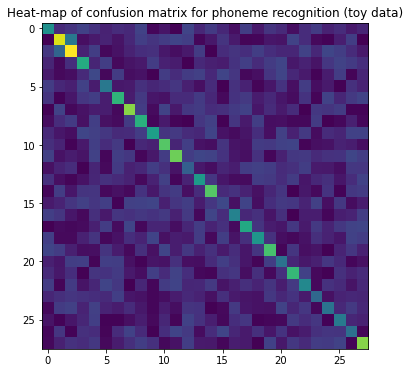

In [165]:
plt.figure(figsize=(6,6))
plt.imshow(confusion)
plt.title('Heat-map of confusion matrix for phoneme recognition (toy data)')
plt.show()

## Statistical tests

**DISCLAIMER:** If you have not already, *you should* take a course in
statistical analysis. There are plenty of good courses out there. In
this short chapter, we can only skim through some basic principles, which
can not replace a thorough understanding of methods. Applying
statistical tests without understanding them properly will *regularly
lead to incorrect conclusions*.


### Student's t-test

To determine if two normally distributed sets of values
have the same mean, we use [Student's
t-test](https://en.wikipedia.org/wiki/Student%27s_t-test). To be
applicable, it is critical that the sets really do follow the Gaussian
distribution (see "Normality tests" below). The t-test is intended for
small data sets, usually with less than 30 data points, and is not
meaningful for larger sets. Typical applications in speech and audio
are:

-   Suppose we have made a MUSHRA-test, where we want to compare whether
    a new method B is better than the old method A. The mean of B is
    better (higher) than that of A, but how do we know if the result is
    statistically significant? First of all, we need to check that
    measurements follow the Gaussian distribution (see "Normality tests"
    below). If distributions are indeed Gaussian, we can apply the
    t-test. Given a threshold for significance (say 5%), the t-test
    answers; either H=0, the difference between A and B is not
    significant, or H=1, that B is better than A.
-   Similarly, we can calculate the difference between A and B and if
    the distribution is Gaussian; we can determine whether the
    difference to zero is statistically significant.

If the data sets are not normally distributed, it is often possible to
use the [Wilcoxon rank-sum
test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) or the
[Wilcoxon signed-rank
test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) instead.

### Normality tests

Many statistical tests are only applicable when the input signal follows
a Gaussian distribution. To test whether a distribution indeed is
Gaussian, we use a [normality
test](https://en.wikipedia.org/wiki/Normality_test). The [Shapiro-Wilk
test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) is one
particular test of normality, which is particularly reliable. The output
of normality tests is that, given a particular confidence level (such
as 5%), the given data set is Gaussian.


### ANOVA

When comparing multiple data sets at the same time, [analysis of
variance](https://en.wikipedia.org/wiki/Analysis_of_variance) (ANOVA)
can be interpreted as a generalization of the t-test. It tries to
explain phenomena in the data by assigning them to different sources
of variation. Say if we observe differences between methods A and B but
know that some listeners have taken the test in the morning and others
in the evening, we can analyze whether the difference is due to the 
time of day or due to inherent differences in A and B.

Again, it is important to observe the assumptions of this test, namely,
the classical version of ANOVA assumes that prediction errors are
normal, that measurements are independent and the assigned groups of
data have uniform statistics.

### Correlation tests

Often, two data sets are correlated. For example, if we analyze the
fundamental frequency and intensity of a speech signal, we probably find
that shouted speech has a high intensity and fundamental frequency,
whereas silent speech has low intensity and a low fundamental. To check
whether two data sets indeed have a meaningful correlation, we use
correlation tests. The two most common correlation tests are

-   [Pearson correlation
    coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
    (PCC), which essentially fits a linear regression line through the
    data, such that we can then use the t-test to determine whether the
    thus-explained data is significantly different from the original. In
    other words, the Pearson correlation coefficient assumes a linear
    correlation between variables.
-   [Spearman's rank correlation
    coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
    analyses whether data can be explained by a monotonic function.